[{'ticks': 4619, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 155567350592, 'pos': [814.0, 1004.0]}, {'ticks': 4619, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 155567350688, 'pos': [894.0, 1950.0]}, {'ticks': 4619, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 155567350718, 'pos': [2830.0, 2063.0]}, {'ticks': 4619, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 155567350673, 'pos': [1052.0, 1563.0]}, {'ticks': 4620, 'class': 'EntityDeath', 'entity_type': 'agent', 'agent_id': 155567350592, 'pos': [814.0, 1004.0]}, {'ticks': 4620, 'class': 'EntityDeath', 'entity_type': 'agent', 'agent_id': 155567350688, 'pos': [894.0, 1950.0]}, {'ticks': 4620, 'class': 'EntityDeath', 'entity_type': 'agent', 'agent_id': 155567350718, 'pos': [2830.0, 2063.0]}, {'ticks': 4620, 'class': 'EntityDeath', 'entity_type': 'agent', 'agent_id': 155567350673, 'pos': [1052.0, 1563.0]}, {'ticks': 4620, 'class': 'EntityDeath', 'entity_type': 'enemy', 'agent_id':

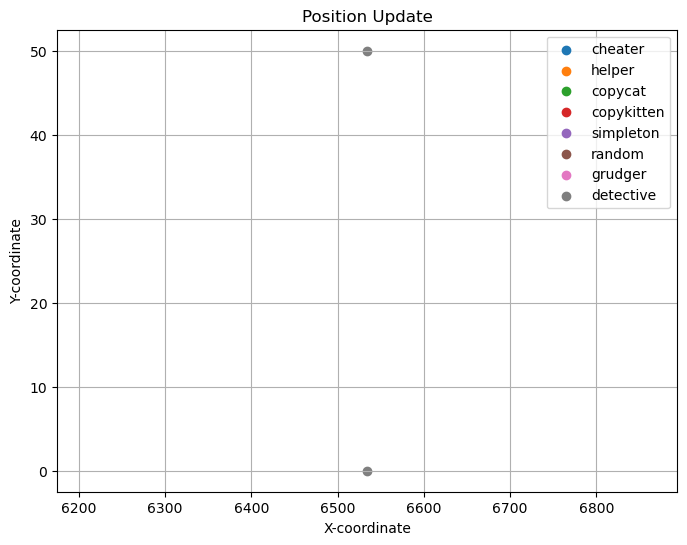

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json


with open('log.json', 'r') as file:
    json_data = json.load(file)


plot_data = []
battle_types = ["cheater", "helper", "copycat", "copykitten", "simpleton", "random", "grudger", "detective"]
print(json_data)
for item in json_data:
    if item["class"] == "AgentHealthUpdate":
        battle_type = item["battle_type"]
        if battle_type in battle_types:
            plot_data.append([item["ticks"], item["health"], battle_type])

plot_data_by_type = {battle_type: [[], []] for battle_type in battle_types}
for data in plot_data:
    x, y, battle_type = data
    plot_data_by_type[battle_type][0].append(x)
    plot_data_by_type[battle_type][1].append(y)


plt.figure(figsize=(8, 6))
for battle_type, data in plot_data_by_type.items():
    x_values, y_values = data
    plt.scatter(x_values, y_values, label=battle_type)

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Position Update')
plt.legend()
plt.grid(True)
plt.show()


# for item in range(len(json_data)):
#     if json_data[item]["class"] == "AgentHealthUpdate":
            
#         # for ag in json_data[item]["AgentHealthUpdate"]:
#         json_data[item]["battle_type"] == battle_types[0]
#         plot_data.append([json_data[item]["ticks"], json_data[item]["health"]])

# x_values = [pos[0] for pos in plot_data]
# y_values = [pos[1] for pos in plot_data]

# plt.figure(figsize=(8, 6))
# plt.scatter(x_values, y_values, color='blue', label='Position')
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.title('Position Update')
# plt.legend()
# plt.grid(True)
# plt.show()


[[3567, 100, 'copycat'], [3567, 150, 'copycat']]
[[3636, 0, 'copycat'], [3636, 50, 'cheater']]
[[2001, 0, 'helper'], [2001, 50, 'grudger']]
[[3990, 150, 'grudger'], [3990, 150, 'grudger']]
[[6534, 0, 'detective'], [6534, 50, 'detective']]
[[3495, 150, 'copycat'], [3495, 150, 'helper']]
[[4936, 125, 'grudger'], [4936, 25, 'copycat']]
[[2043, 50, 'cheater'], [2043, 0, 'cheater']]
[[2273, 50, 'cheater'], [2273, 0, 'helper']]
[[3692, 75, 'cheater'], [3692, 25, 'grudger']]
[[6889, 0, 'detective'], [6889, 50, 'cheater']]
[[1958, 50, 'helper'], [1958, 150, 'helper']]


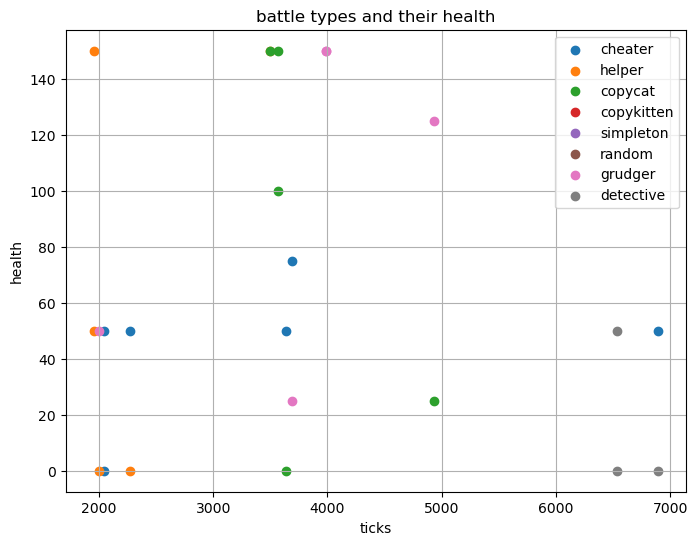

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json



def load_log_data(file_path):
    battle_types = ["cheater", "helper", "copycat", "copykitten", "simpleton", "random", "grudger", "detective"]
    with open(file_path, 'r') as file:
        json_data = json.load(file)
    plot_data = []
    for item in json_data:
        if item["class"] == "AgentHealthUpdate":
            battle_type = item["battle_type"]
            if battle_type in battle_types:
                plot_data.append([item["ticks"], item["health"], battle_type])
    print(plot_data)
    return plot_data

folder_path = "results/batchrun_11/"

all_plot_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json') and file_name != 'config.json':
        file_path = os.path.join(folder_path, file_name)
        plot_data = load_log_data(file_path)
        all_plot_data.extend(plot_data)

plot_data_by_type = {battle_type: [[], []] for battle_type in battle_types}
for data in all_plot_data:
    x, y, battle_type = data
    plot_data_by_type[battle_type][0].append(x)
    plot_data_by_type[battle_type][1].append(y)

plt.figure(figsize=(8, 6))
for battle_type, data in plot_data_by_type.items():
    x_values, y_values = data
    plt.scatter(x_values, y_values, label=battle_type)

plt.xlabel('ticks')
plt.ylabel('health')
plt.title('battle types and their health')
plt.legend()
plt.grid(True)
plt.show()


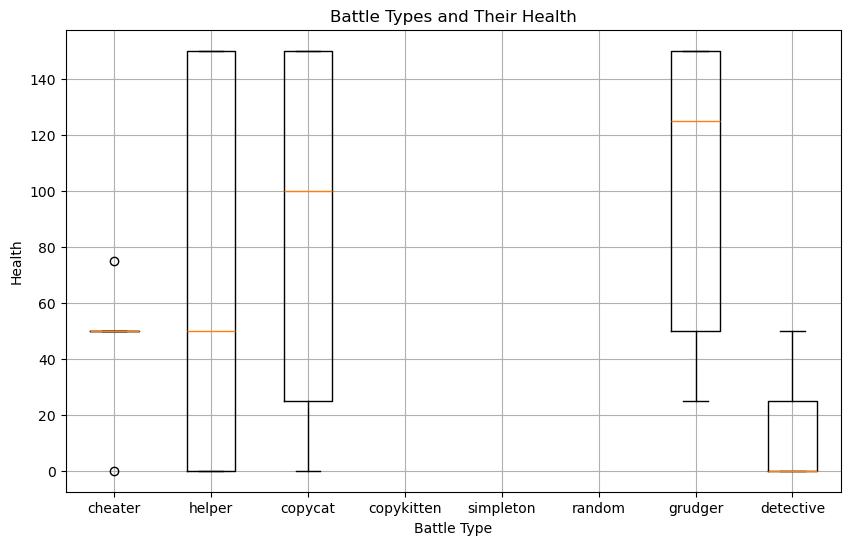

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

def load_log_data(file_path):
    battle_types = ["cheater", "helper", "copycat", "copykitten", "simpleton", "random", "grudger", "detective"]
    with open(file_path, 'r') as file:
        json_data = json.load(file)
    plot_data = []
    for item in json_data:
        if item["class"] == "AgentHealthUpdate":
            battle_type = item["battle_type"]
            if battle_type in battle_types:
                plot_data.append([item["ticks"], item["health"], battle_type])
    return plot_data

folder_path = "results/batchrun_11/"

all_plot_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json') and file_name != 'config.json':
        file_path = os.path.join(folder_path, file_name)
        plot_data = load_log_data(file_path)
        all_plot_data.extend(plot_data)

plot_data_by_type = {battle_type: [] for battle_type in battle_types}
for data in all_plot_data:
    _, health, battle_type = data
    plot_data_by_type[battle_type].append(health)

# Create a list of health values for each battle type
health_values_by_type = [plot_data_by_type[battle_type] for battle_type in battle_types]

plt.figure(figsize=(10, 6))
plt.boxplot(health_values_by_type, labels=battle_types)
plt.xlabel('Battle Type')
plt.ylabel('Health')
plt.title('Battle Types and Their Health')
plt.grid(True)
plt.show()

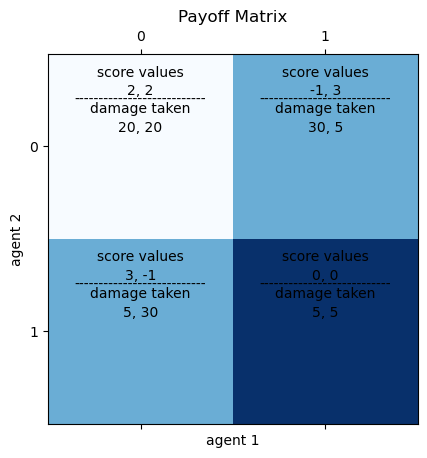

In [3]:
color_matrix = np.array([[1, 2],
                         [2, 3]])

values = np.array([[(2, 2), (-1, 3)],[(3, -1), (0, 0)]])
damage = np.array([[(20, 20), (30, 5)],[(5, 30), (5, 5)]])

fig, ax = plt.subplots()

cax = ax.matshow(color_matrix, cmap=plt.cm.Blues)

plt.xlabel("agent 2 Strategies")
plt.ylabel("agent 1 Strategies")

for i in range(len(values)):
    for j in range(len(values[i])):
        plt.text(j, i-.4, "score values", va='center', ha='center')
        plt.text(j, i-.3, f"{values[i, j][0]}, {values[i, j][1]}", va='center', ha='center')
        plt.text(j, i-.25, f"---------------------------", va='center', ha='center')
        plt.text(j, i-.2, "damage taken", va='center', ha='center')
        plt.text(j, i-.1, f"{damage[i, j][0]}, {damage[i, j][1]}", va='center', ha='center')

plt.title('Payoff Matrix')
plt.xlabel('agent 1')
plt.ylabel('agent 2')
plt.show()